In [1]:
####################################################################################################################
#                              Linear Regression applied on the "Koblenz Dataset"                                  #
#          (https://nbviewer.jupyter.org/github/isc-konstanz/household_data/blob/2020-04-15/main.ipynb)            #
#                                                                                                                   #
#                                                                                                                  #
#                                              Following this example:                                             #
#              https://towardsdatascience.com/introduction-to-linear-regression-in-python-c12a072bedf0             #
#                                    (also the images included are from the above source)                          #
#                                                                                                                  #

#                                     Ronald Siebes, VU Amsterdam, May 30th, 2021   
#                                         http://interconnect-project.eu                                           #
####################################################################################################################


![Green lines show the difference between actual values Y and estimate values Yₑ](ordinary-least-squares.png "Ordinary Least Squares") </center>

Green lines show the difference between actual values Y and estimate values Yₑ
<br/>
    Yₑ = α + β X
 
<br/>

![](alpha-beta.gif "Equation") 

    

In [1]:
# Import the libraries to load, manipulate and visualize data 

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Import the CSV data of 'pump6'

pumpData = pd.read_csv("pump6-daily.csv") #choose one
# Show the first five rows of our dataframe
pumpData.head()

,EnergyConsumption,OutdoorTemp
0,4.65,9.96
1,4.58,10.25
2,4.06,8.50
3,5.34,8.96
4,3.31,9.00


In [5]:
# Calculate the mean of EnergyConsumption and OutdoorTemp
outdoorTempMean = np.mean(pumpData['OutdoorTemp'])                # Independent variable (x)
energyConsumptionMean = np.mean(pumpData['EnergyConsumption'])    # Dependent variable (y)   

# Calculate the terms needed for the numator and denominator of beta
pumpData['xycov'] = (pumpData['OutdoorTemp'] - outdoorTempMean) * (pumpData['EnergyConsumption'] - energyConsumptionMean)
pumpData['xvar'] = (pumpData['OutdoorTemp'] - outdoorTempMean)**2

# Calculate beta and alpha
beta = pumpData['xycov'].sum() / pumpData['xvar'].sum()
alpha = energyConsumptionMean - (beta * outdoorTempMean)
print(f'alpha = {alpha}')
print(f'beta = {beta}')

ypred = alpha + beta * pumpData['OutdoorTemp']
ypred

alpha = 5.832974431316357
beta = -0.1538598312717606


0      4.300531
1      4.255911
2      4.525166
3      4.454390
4      4.448236
         ...   
893    4.557476
894    4.652870
895    4.172827
896    3.889725
897    3.101962
Name: OutdoorTemp, Length: 898, dtype: float64

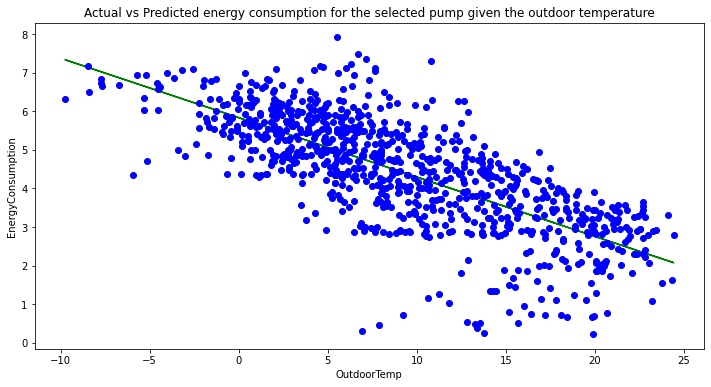

In [6]:
# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(pumpData['OutdoorTemp'], ypred, color='green')     # regression line
plt.plot(pumpData['OutdoorTemp'], pumpData['EnergyConsumption'], 'ro', color='blue')   # scatter plot showing actual data
plt.title('Actual vs Predicted energy consumption for the selected pump given the outdoor temperature')
plt.xlabel('OutdoorTemp')
plt.ylabel('EnergyConsumption')

plt.show()